In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
conn = engine.connect()
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [28]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [29]:
# Perform a query to retrieve the data and precipitation scores
first_date = dt.date(2016, 8, 23)
last_date = dt.date(2017, 8, 23)

prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date.between(first_date, last_date)).all()
prcp


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [30]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurements_df = pd.DataFrame(prcp, columns=['date', 'prcp'])
measurements_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [31]:
# Sort the dataframe by date
measurements_df =  measurements_df.sort_values('date')
measurements_df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


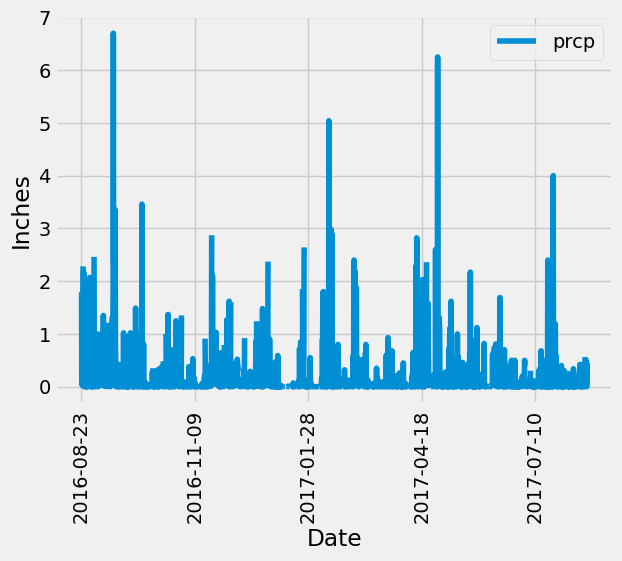

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

#measurements_df.plot(kind="bar")
measurements_df.plot(x ="date", y ="prcp" , rot=90)
plt.xlabel("Date")
#plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(measurements_df.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [64]:
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]
station_calc = session.query(*calc).\
    filter((measurement.station) == "USC00519281").\
    group_by(measurement.station).\
    order_by(measurement.station).all()
station_calc

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [78]:
first_date = dt.date(2016, 8, 23)
last_date = dt.date(2017, 8, 23)

station_freq = session.query(measurement.tobs, ((measurement.station).count())).\
    filter(func.max(measurement.tobs),(measurement.date.between(first_date, last_date)),\
    measurement.station == "USC00519281").all()

print(station_freq)

AttributeError: Neither 'InstrumentedAttribute' object nor 'Comparator' object associated with measurement.station has an attribute 'count'

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

first_date = dt.date(2016, 8, 23)
last_date = dt.date(2017, 8, 23)

station_freq = session.query(measurement.tobs).\
    filter(measurement.date>= first_date).filter(measurement.station == "USC00519281").all()
   

print(station_freq)

  


[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [83]:
temp_list = []
for temps in station_freq:
    temp_list.append(temps[0])
print(temp_list)

[77.0, 77.0, 80.0, 80.0, 75.0, 73.0, 78.0, 77.0, 78.0, 80.0, 80.0, 78.0, 78.0, 78.0, 73.0, 74.0, 80.0, 79.0, 77.0, 80.0, 76.0, 79.0, 75.0, 79.0, 78.0, 79.0, 78.0, 78.0, 76.0, 74.0, 77.0, 78.0, 79.0, 79.0, 77.0, 80.0, 78.0, 78.0, 78.0, 77.0, 79.0, 79.0, 79.0, 79.0, 75.0, 76.0, 73.0, 72.0, 71.0, 77.0, 79.0, 78.0, 79.0, 77.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 77.0, 74.0, 75.0, 76.0, 73.0, 76.0, 74.0, 77.0, 76.0, 76.0, 74.0, 75.0, 75.0, 75.0, 75.0, 71.0, 63.0, 70.0, 68.0, 67.0, 77.0, 74.0, 77.0, 76.0, 76.0, 75.0, 76.0, 75.0, 73.0, 75.0, 73.0, 75.0, 74.0, 75.0, 74.0, 75.0, 73.0, 75.0, 73.0, 73.0, 74.0, 70.0, 72.0, 70.0, 67.0, 67.0, 69.0, 70.0, 68.0, 69.0, 69.0, 66.0, 65.0, 68.0, 62.0, 75.0, 70.0, 69.0, 76.0, 76.0, 74.0, 73.0, 71.0, 74.0, 74.0, 72.0, 71.0, 72.0, 74.0, 69.0, 67.0, 72.0, 70.0, 64.0, 63.0, 63.0, 62.0, 70.0, 70.0, 62.0, 62.0, 63.0, 65.0, 69.0, 77.0, 70.0, 74.0, 69.0, 72.0, 71.0, 69.0, 71.0, 71.0, 72.0, 72.0, 69.0, 70.0, 66.0, 65.0, 69.0, 68.0, 68.0, 68.0, 59.0, 60.0, 70.0, 73.

In [84]:
#list comprehension
temp_list = [temps[0] for temps in station_freq]

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

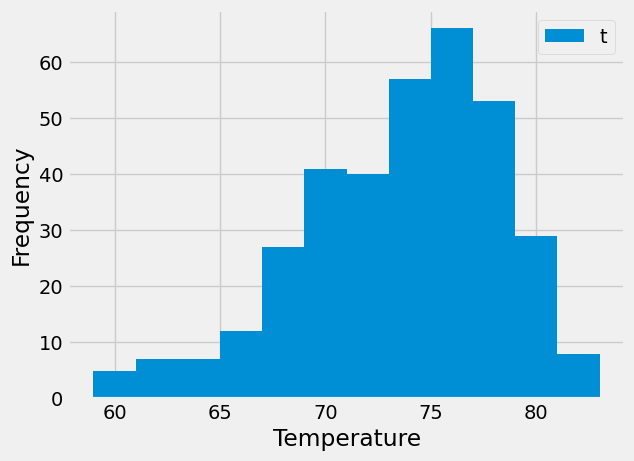

In [95]:

x = temp_list
plt.hist(x,bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()


Text(0.5, 4.183333333333314, 'Temperature')

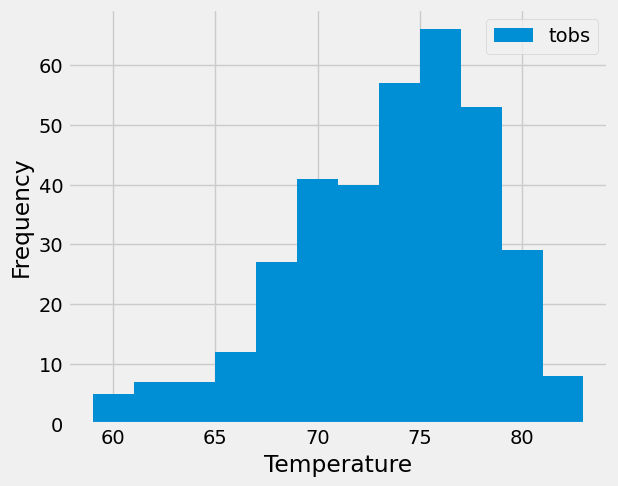

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()